0. EDA
1. Run Linear Regression 
2. Run SVR
3. PCA

In [1]:
import pandas as pd
import seaborn as sns
from sklearn.svm import SVR
import numpy as np
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
# Import PCA
from sklearn import decomposition
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
from sklearn import linear_model
from sklearn import metrics
from yellowbrick.regressor import ResidualsPlot
import matplotlib.pyplot as plt


In [2]:
## Load the data
path="C:\\Users\\fbaharkoush\\IE 598 Machine Learning\\Homework\\HW 5\\"
df_tbd=pd.read_csv(path+"hw5_treasury yield curve data.csv")
df_tbd.drop("Date",axis=1,inplace=True)
df_tbd.shape

(8353, 31)

In [3]:
df_tbd.describe()

,SVENF01,SVENF02,SVENF03,SVENF04,SVENF05,SVENF06,SVENF07,SVENF08,SVENF09,SVENF10,...,SVENF22,SVENF23,SVENF24,SVENF25,SVENF26,SVENF27,SVENF28,SVENF29,SVENF30,Adj_Close
count,8353.000000,8353.000000,8353.000000,8353.000000,8353.00000,8353.000000,8353.000000,8353.000000,8353.000000,8353.000000,...,8353.000000,8353.000000,8353.000000,8353.000000,8353.000000,8353.000000,8353.000000,8353.000000,8353.000000,8071.000000
mean,3.895104,4.371348,4.779336,5.128279,5.42020,5.657948,5.845959,5.989599,6.094526,6.166257,...,5.808739,5.743881,5.678833,5.614071,5.549984,5.486883,5.425019,5.364587,5.305740,5.509793
std,2.671616,2.531630,2.379307,2.260085,2.17498,2.116034,2.074912,2.045118,2.022213,2.003407,...,1.889966,1.891488,1.895394,1.901730,1.910500,1.921662,1.935136,1.950811,1.968547,2.491110
min,0.072700,0.327300,0.630300,1.013000,1.42450,1.698200,1.807300,1.885000,1.942100,1.988200,...,1.489600,1.283000,1.100800,0.941000,0.801800,0.681200,0.577100,0.487600,0.411100,2.801050
25%,1.220600,1.923100,2.619300,3.076300,3.66070,4.214400,4.510300,4.711300,4.851600,4.928000,...,4.220400,4.124900,4.048100,4.008700,3.987100,3.920400,3.875100,3.856100,3.858000,3.130587
50%,4.126300,4.501300,4.635400,4.873300,5.17140,5.496900,5.756000,5.931500,6.057000,6.148100,...,5.662900,5.541000,5.427100,5.293800,5.164400,5.049500,4.933400,4.823600,4.725400,4.956219
75%,6.063800,6.453800,6.700200,6.920700,7.11000,7.331200,7.519800,7.634300,7.720400,7.797700,...,7.518200,7.447200,7.365600,7.278900,7.202100,7.108300,7.004200,6.909500,6.832000,8.051437
max,9.813800,9.887800,10.145600,10.459900,10.64990,10.741400,10.766300,10.747500,10.701500,10.725100,...,11.324200,11.356900,11.386200,11.412200,11.435300,11.455600,11.473300,11.488800,11.502300,10.150118


In [4]:
### There are 282 instances which is equal to 3.37% of target variable missing. I am going to drop those instances.
df_tbd.isnull().sum().sort_values(ascending=False).head()

Adj_Close    282
SVENF15        0
SVENF02        0
SVENF03        0
SVENF04        0
dtype: int64

In [5]:
print((282/df_tbd.shape[0])*100)
df_tbd.dropna(subset=["Adj_Close"],how="all",inplace=True)

3.3760325631509636


### Prepare the Data


In [6]:
### Prepare the Data
X=df_tbd.drop("Adj_Close",axis=1).values
y=df_tbd["Adj_Close"].values
X_col=df_tbd.drop("Adj_Close",axis=1).columns
### Scale the date
X=scale(X)
y=scale(y)

In [7]:
Correlation_Mat=np.corrcoef(df_tbd[X_col].values.T)

In [8]:
### Correation of all featrues
df_tbd[X_col].corr().style.background_gradient(cmap='coolwarm')

,SVENF01,SVENF02,SVENF03,SVENF04,SVENF05,SVENF06,SVENF07,SVENF08,SVENF09,SVENF10,SVENF11,SVENF12,SVENF13,SVENF14,SVENF15,SVENF16,SVENF17,SVENF18,SVENF19,SVENF20,SVENF21,SVENF22,SVENF23,SVENF24,SVENF25,SVENF26,SVENF27,SVENF28,SVENF29,SVENF30
SVENF01,1,0.986417,0.958364,0.924637,0.890691,0.860385,0.835864,0.817792,0.805833,0.799116,0.796574,0.797136,0.79983,0.803812,0.808372,0.812918,0.816962,0.820106,0.822026,0.822472,0.821254,0.818245,0.81338,0.80665,0.7981,0.787826,0.775963,0.762679,0.748167,0.732632
SVENF02,0.986417,1,0.991325,0.971026,0.945906,0.920994,0.899469,0.882818,0.871309,0.864483,0.861544,0.861591,0.863757,0.867255,0.871406,0.875627,0.879429,0.882403,0.884211,0.884583,0.883311,0.880253,0.875325,0.868506,0.85983,0.849384,0.8373,0.823744,0.80891,0.793006
SVENF03,0.958364,0.991325,1,0.993681,0.978891,0.960996,0.94381,0.929497,0.918916,0.912072,0.908515,0.907593,0.908612,0.910907,0.913877,0.916994,0.919796,0.921891,0.922945,0.922683,0.920891,0.917414,0.912155,0.90508,0.896211,0.88562,0.87343,0.859797,0.844907,0.828962
SVENF04,0.924637,0.971026,0.993681,1,0.99548,0.985206,0.973186,0.962005,0.952978,0.946523,0.942527,0.940605,0.940265,0.940996,0.942308,0.943751,0.944925,0.945472,0.945085,0.943506,0.940525,0.93599,0.929804,0.921925,0.912369,0.901202,0.888536,0.874519,0.859327,0.843153
SVENF05,0.890691,0.945906,0.978891,0.99548,1,0.996934,0.99018,0.982494,0.975478,0.969858,0.965797,0.963147,0.961607,0.960815,0.960401,0.960007,0.959299,0.957976,0.955767,0.952442,0.947814,0.941744,0.934145,0.92498,0.914267,0.902072,0.888503,0.873704,0.857846,0.841114
SVENF06,0.860385,0.920994,0.960996,0.985206,0.996934,1,0.998022,0.993749,0.988922,0.984458,0.980717,0.977729,0.975348,0.973341,0.971443,0.969382,0.966893,0.963729,0.959664,0.954503,0.948087,0.940299,0.931069,0.920375,0.908243,0.894745,0.879994,0.864134,0.847334,0.829776
SVENF07,0.835864,0.899469,0.94381,0.973186,0.99018,0.998022,1,0.998756,0.996054,0.992905,0.989786,0.986844,0.984041,0.981242,0.978264,0.974905,0.970959,0.966228,0.96053,0.953703,0.94562,0.936188,0.925358,0.913126,0.899534,0.884664,0.868636,0.851601,0.83373,0.815205
SVENF08,0.817792,0.882818,0.929497,0.962005,0.982494,0.993749,0.998756,1,0.999202,0.997388,0.995086,0.992506,0.989674,0.986516,0.982907,0.978696,0.973721,0.967825,0.960859,0.952695,0.94323,0.9324,0.920175,0.906572,0.891646,0.875496,0.858251,0.840071,0.821133,0.801622
SVENF09,0.805833,0.871309,0.918916,0.952978,0.975478,0.988922,0.996054,0.999202,1,0.999443,0.998057,0.996069,0.993533,0.990406,0.986593,0.981974,0.976419,0.969798,0.961988,0.952886,0.942413,0.930524,0.917211,0.902507,0.886484,0.869255,0.850962,0.831773,0.811874,0.791457
SVENF10,0.799116,0.864483,0.912072,0.946523,0.969858,0.984458,0.992905,0.997388,0.999443,1,0.99955,0.998305,0.996313,0.993536,0.98989,0.985269,0.979557,0.97264,0.964413,0.95479,0.943709,0.93114,0.917093,0.901615,0.884793,0.866751,0.847646,0.827655,0.806972,0.785796


### Linear Regression Model
Model 1.1: Without Eleminating Correlated Features

In [9]:
### SPllit the data
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.15,random_state=42)
X_features=df_tbd[X_col].columns

In [10]:
import time
start_time = time.time()

### chose model
linear_reg=linear_model.LinearRegression()
### fit the model
linear_reg.fit(X_train,y_train)
### predict
y_pred=linear_reg.predict(X_test)
y_pred_train=linear_reg.predict(X_train)
length_of_modeling=(time.time() - start_time)

In [11]:
### R^2 of train and test
r_square=[metrics.explained_variance_score(y_train,y_pred_train),metrics.explained_variance_score(y_test,y_pred)]
### MAE
MAE=[metrics.mean_absolute_error(y_train,y_pred_train),metrics.mean_absolute_error(y_test,y_pred)]
### MSE
MSE=[metrics.mean_squared_error(y_train,y_pred_train),metrics.mean_squared_error(y_test,y_pred)]
## RMSE
RMSE=[np.sqrt(metrics.mean_squared_error(y_train,y_pred_train)),np.sqrt(metrics.mean_squared_error(y_test,y_pred))]

In [12]:
## Measure Accuracy Molde 1.1 (Using All Features)
df_lr_acc1=pd.DataFrame({
    "Index":["Train","Test"],
"R^2":r_square,"MAE":MAE,"MSE":MSE,
"RMSE": RMSE})
df_lr_acc1["Model"]="Linear Regression All Features"
df_lr_acc1["Computation (s)"]=length_of_modeling
df_lr_acc1

,Index,R^2,MAE,MSE,RMSE,Model,Computation (s)
0,Train,0.902273,0.249414,0.097213,0.311789,Linear Regression All Features,0.009986
1,Test,0.904134,0.251227,0.098649,0.314084,Linear Regression All Features,0.009986


In [13]:
### Coeficient of Linear Regression
pd.DataFrame(linear_reg.coef_,X_features).T

,SVENF01,SVENF02,SVENF03,SVENF04,SVENF05,SVENF06,SVENF07,SVENF08,SVENF09,SVENF10,...,SVENF21,SVENF22,SVENF23,SVENF24,SVENF25,SVENF26,SVENF27,SVENF28,SVENF29,SVENF30
0,-5.143278,53.3088,-234.759846,526.530805,-589.532938,190.492611,236.945233,-244.275422,-35.352577,253.215819,...,408.409194,-280.292783,127.150461,-301.930746,-574.370423,172.850892,74.645068,613.281943,-59.106102,-249.611007


In [14]:
pd.DataFrame({"Intercept":[linear_reg.intercept_]})

,Intercept
0,-0.000254


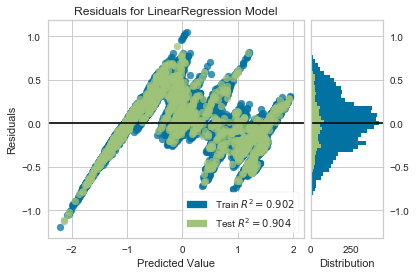

In [15]:
visualizer=ResidualsPlot(linear_reg)
visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.poof() 

### Linear Regression Model
Model 1.2: after dropping correlated features

In [16]:
del X, X_train, X_test, y, y_train , y_test, y_pred, y_pred_train

In [17]:
df_corr_matrix=df_tbd[X_col].corr().abs()

In [18]:
# Select upper triangle of correlation matrix
upper=df_corr_matrix.where(np.triu(np.ones(df_corr_matrix.shape), k=1).astype(np.bool))
# Find index of feature columns with correlation greater than 0.80
to_drop = [column for column in upper.columns if any(upper[column] > 0.75)]

In [19]:
X=df_tbd[X_col].drop(to_drop,axis=1).values
y=df_tbd["Adj_Close"].values
X_features=df_tbd[X_col].drop(to_drop,axis=1).columns
### Scale the date
X=scale(X)
y=scale(y)

In [20]:
### SPllit the data
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.15,random_state=42)

In [21]:
### chose model
linear_reg=linear_model.LinearRegression()
### fit the model
linear_reg.fit(X_train,y_train)
### predict
y_pred=linear_reg.predict(X_test)
y_pred_train=linear_reg.predict(X_train)
length_of_modeling=(time.time() - start_time)

In [22]:
### R^2 of train and test
r_square=[metrics.explained_variance_score(y_train,y_pred_train),metrics.explained_variance_score(y_test,y_pred)]
### MAE
MAE=[metrics.mean_absolute_error(y_train,y_pred_train),metrics.mean_absolute_error(y_test,y_pred)]
### MSE
MSE=[metrics.mean_squared_error(y_train,y_pred_train),metrics.mean_squared_error(y_test,y_pred)]
## RMSE
RMSE=[np.sqrt(metrics.mean_squared_error(y_train,y_pred_train)),np.sqrt(metrics.mean_squared_error(y_test,y_pred))]

In [23]:
pd.DataFrame(linear_reg.coef_,X_features).T

,SVENF01
0,-0.847919


In [24]:
pd.DataFrame({"Intercept":[linear_reg.intercept_]})

,Intercept
0,-0.002149


In [25]:
## Measure Accuracy Molde 1.1
df_lr_acc2=pd.DataFrame({
    "Index":["Train","Test"],
"R^2":r_square,"MAE":MAE,"MSE":MSE,
"RMSE": RMSE})
df_lr_acc2["Model"]="Linear Reg Exlcluding Correlated Features"
df_lr_acc2["Computation (s)"]=length_of_modeling
df_lr_acc2

,Index,R^2,MAE,MSE,RMSE,Model,Computation (s)
0,Train,0.721765,0.417872,0.27677,0.526090,Linear Reg Exlcluding Correlated Features,1.032239
1,Test,0.721636,0.425444,0.28664,0.535388,Linear Reg Exlcluding Correlated Features,1.032239


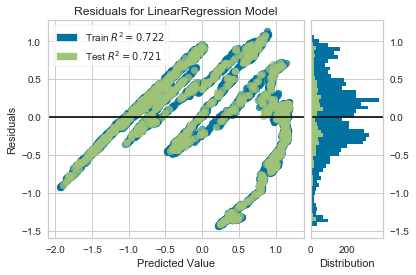

In [26]:
visualizer=ResidualsPlot(linear_reg)
visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.poof() 

### SVR: Before Running PCA
1. SVR_linear
2. SV_rbf

##### SVR_linear

In [27]:
### Prepare the Data
del X, X_train, X_test, y, y_train , y_test, y_pred, y_pred_train

In [28]:
### Prepare the Data
X=df_tbd.drop("Adj_Close",axis=1).values
y=df_tbd["Adj_Close"].values
X_col=df_tbd.drop("Adj_Close",axis=1).columns
X_features=df_tbd[X_col].columns
### Scale the date
X=scale(X)
y=scale(y)

In [29]:
### SPllit the data
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.15,random_state=42)

In [30]:
### Load the Model
start_time = time.time()
svr_linear = SVR(kernel='linear')
## Fit the model
svr_linear.fit(X_train,y_train)
### predict
y_pred=svr_linear.predict(X_test)
y_pred_train=svr_linear.predict(X_train)
length_of_modeling=(time.time() - start_time)

In [31]:
### R^2 of train and test
r_square=[metrics.explained_variance_score(y_train,y_pred_train),metrics.explained_variance_score(y_test,y_pred)]
### MAE
MAE=[metrics.mean_absolute_error(y_train,y_pred_train),metrics.mean_absolute_error(y_test,y_pred)]
### MSE
MSE=[metrics.mean_squared_error(y_train,y_pred_train),metrics.mean_squared_error(y_test,y_pred)]
## RMSE
RMSE=[np.sqrt(metrics.mean_squared_error(y_train,y_pred_train)),np.sqrt(metrics.mean_squared_error(y_test,y_pred))]

In [32]:
pd.DataFrame(svr_linear.coef_,columns=X_features)

,SVENF01,SVENF02,SVENF03,SVENF04,SVENF05,SVENF06,SVENF07,SVENF08,SVENF09,SVENF10,...,SVENF21,SVENF22,SVENF23,SVENF24,SVENF25,SVENF26,SVENF27,SVENF28,SVENF29,SVENF30
0,0.31224,-0.26275,-1.89201,-0.057542,1.383026,1.50333,0.754565,-0.213348,-0.954514,-1.287506,...,-0.12549,-0.561058,-0.923559,-1.160391,-1.217461,-1.056846,-0.657643,0.001127,0.91409,2.082106


In [33]:
pd.DataFrame({"Intercept":[svr_linear.intercept_]})

,Intercept
0,[-0.003328551657788893]


In [34]:
## Measure Accuracy Molde 1.1
df_svr_lr=pd.DataFrame({
    "Index":["Train","Test"],
"R^2":r_square,"MAE":MAE,"MSE":MSE,
"RMSE": RMSE})
df_svr_lr["Model"]="SVR Linear"
df_svr_lr["Computation (s)"]=length_of_modeling
df_svr_lr

,Index,R^2,MAE,MSE,RMSE,Model,Computation (s)
0,Train,0.893919,0.251190,0.105535,0.324861,SVR Linear,11.587043
1,Test,0.894682,0.254702,0.108379,0.329209,SVR Linear,11.587043


##### SVR_rfb

In [35]:
### Prepare the Data
del X, X_train, X_test, y, y_train , y_test, y_pred, y_pred_train

In [36]:
### Prepare the Data
X=df_tbd.drop("Adj_Close",axis=1).values
y=df_tbd["Adj_Close"].values
X_col=df_tbd.drop("Adj_Close",axis=1).columns
X_features=df_tbd[X_col].columns
### Scale the date
X=scale(X)
y=scale(y)

In [37]:
### SPllit the data
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.15,random_state=42)

In [38]:
### Load the Model
start_time = time.time()
svr_rbf = SVR(kernel='rbf',gamma='scale')
## Fit the model
svr_rbf.fit(X_train,y_train)
### predict
y_pred=svr_rbf.predict(X_test)
y_pred_train=svr_rbf.predict(X_train)
length_of_modeling=(time.time() - start_time)

In [39]:
### R^2 of train and test
r_square=[metrics.explained_variance_score(y_train,y_pred_train),metrics.explained_variance_score(y_test,y_pred)]
### MAE
MAE=[metrics.mean_absolute_error(y_train,y_pred_train),metrics.mean_absolute_error(y_test,y_pred)]
### MSE
MSE=[metrics.mean_squared_error(y_train,y_pred_train),metrics.mean_squared_error(y_test,y_pred)]
## RMSE
RMSE=[np.sqrt(metrics.mean_squared_error(y_train,y_pred_train)),np.sqrt(metrics.mean_squared_error(y_test,y_pred))]

In [40]:
## Measure Accuracy Molde 1.1
df_svr_rfb=pd.DataFrame({
    "Index":["Train","Test"],
"R^2":r_square,"MAE":MAE,"MSE":MSE,
"RMSE": RMSE})
df_svr_rfb["Model"]="SVR RBF"
df_svr_rfb["Computation (s)"]=length_of_modeling
df_svr_rfb

,Index,R^2,MAE,MSE,RMSE,Model,Computation (s)
0,Train,0.989421,0.073756,0.010539,0.102658,SVR RBF,1.157941
1,Test,0.989597,0.073983,0.010734,0.103605,SVR RBF,1.157941


### PCA
 Select first 3 Features that explain the data

In [41]:
### Prepare the Data
del X, X_train, X_test, y, y_train , y_test, y_pred, y_pred_train
X=df_tbd.drop("Adj_Close",axis=1).values
y=df_tbd["Adj_Close"].values
X_col=df_tbd.drop("Adj_Close",axis=1).columns
X_features=df_tbd[X_col].columns
### Scale the date
X=scale(X)
y=scale(y)

In [42]:
##Load the Model
pca=decomposition.PCA()
treasury_pca=pca.fit_transform(X)

In [43]:
#Change the Number Fromat of DATA frame
pd.options.display.float_format = '{:,.4f}'.format
df_exvar_ratio=pd.DataFrame(pca.explained_variance_ratio_*100,X_features).reset_index().rename(columns={
    "index":"Features",0:"explained_variance_ratio"})
### Sort
df_exvar_ratio.sort_values("explained_variance_ratio",ascending=False,inplace=True)
## Cumulative Sume
df_exvar_ratio["explained_variance_ratio_cumsum"]=df_exvar_ratio["explained_variance_ratio"].cumsum()

##### Select first 3 Features that explain the data

In [44]:
#### Featurs Selections
list_of_PCA_features=list(df_exvar_ratio.iloc[:3]["Features"])
print("First 3 Features Explains", df_exvar_ratio.iloc[:3]["explained_variance_ratio_cumsum"].max(),"% of the dataset")

First 3 Features Explains 99.43469070485438 % of the dataset


### Linear Regression Model with PCA 

In [45]:
del X, y,X_features ,X_col

In [46]:
### Prepare the Data
X=df_tbd[list_of_PCA_features].values
y=df_tbd["Adj_Close"].values
X_col=df_tbd[list_of_PCA_features].columns
X_features=df_tbd[list_of_PCA_features].columns
### Scale the date
X=scale(X)
y=scale(y)

In [47]:
### SPllit the data
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.15,random_state=42)

In [48]:
### chose model
start_time = time.time()

linear_reg=linear_model.LinearRegression()
### fit the model
linear_reg.fit(X_train,y_train)
### predict
y_pred=linear_reg.predict(X_test)
y_pred_train=linear_reg.predict(X_train)
length_of_modeling=(time.time() - start_time)


In [49]:
### R^2 of train and test
r_square=[metrics.explained_variance_score(y_train,y_pred_train),metrics.explained_variance_score(y_test,y_pred)]
### MAE
MAE=[metrics.mean_absolute_error(y_train,y_pred_train),metrics.mean_absolute_error(y_test,y_pred)]
### MSE
MSE=[metrics.mean_squared_error(y_train,y_pred_train),metrics.mean_squared_error(y_test,y_pred)]
## RMSE
RMSE=[np.sqrt(metrics.mean_squared_error(y_train,y_pred_train)),np.sqrt(metrics.mean_squared_error(y_test,y_pred))]

In [50]:
## Measure Accuracy Molde 1.1 (Using All Features)
df_lr_acc_pca=pd.DataFrame({
    "Index":["Train","Test"],
"R^2":r_square,"MAE":MAE,"MSE":MSE,
"RMSE": RMSE})
df_lr_acc_pca["Model"]="Linear Regression 3 PCA Features"
df_lr_acc_pca["Computation (s)"]=length_of_modeling
df_lr_acc_pca

,Index,R^2,MAE,MSE,RMSE,Model,Computation (s)
0,Train,0.8126,0.3681,0.1864,0.4318,Linear Regression 3 PCA Features,0.0020
1,Test,0.8111,0.3779,0.1944,0.4409,Linear Regression 3 PCA Features,0.0020


In [51]:
### Coeficient of Linear Regression
pd.DataFrame(linear_reg.coef_,X_features).T

,SVENF01,SVENF02,SVENF03
0,-0.5403,1.5370,-1.9036


In [52]:
pd.DataFrame({"Intercept":[linear_reg.intercept_]})

,Intercept
0,0.0003


### SVR: After Running PCA
1. SVR_linear
2. SV_rbf

###### SVR Linear  PCA

In [53]:
### Prepare the Data
del X, X_train, X_test, y, y_train , y_test, y_pred, y_pred_train

In [54]:
### Prepare the Data
X=df_tbd[list_of_PCA_features].values
y=df_tbd["Adj_Close"].values
X_col=df_tbd[list_of_PCA_features].columns
X_features=df_tbd[list_of_PCA_features].columns
### Scale the date
X=scale(X)
y=scale(y)

In [55]:
### SPllit the data
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.15,random_state=42)

In [56]:
### Load the Model
start_time = time.time()
svr_linear = SVR(kernel='linear')
## Fit the model
svr_linear.fit(X_train,y_train)
### predict
y_pred=svr_linear.predict(X_test)
y_pred_train=svr_linear.predict(X_train)
length_of_modeling=(time.time() - start_time)

In [57]:
### R^2 of train and test
r_square=[metrics.explained_variance_score(y_train,y_pred_train),metrics.explained_variance_score(y_test,y_pred)]
### MAE
MAE=[metrics.mean_absolute_error(y_train,y_pred_train),metrics.mean_absolute_error(y_test,y_pred)]
### MSE
MSE=[metrics.mean_squared_error(y_train,y_pred_train),metrics.mean_squared_error(y_test,y_pred)]
## RMSE
RMSE=[np.sqrt(metrics.mean_squared_error(y_train,y_pred_train)),np.sqrt(metrics.mean_squared_error(y_test,y_pred))]

In [58]:
## Measure Accuracy Molde 1.1
df_svr_lr_pca=pd.DataFrame({
    "Index":["Train","Test"],
"R^2":r_square,"MAE":MAE,"MSE":MSE,
"RMSE": RMSE})
df_svr_lr_pca["Model"]="SVR Linear 3 PCA Features"
df_svr_lr_pca["Computation (s)"]=length_of_modeling

###### SVR RBF  PCA

In [59]:
### Prepare the Data
del X, X_train, X_test, y, y_train , y_test, y_pred, y_pred_train

In [60]:
### Prepare the Data
X=df_tbd[list_of_PCA_features].values
y=df_tbd["Adj_Close"].values
X_col=df_tbd[list_of_PCA_features].columns
X_features=df_tbd[list_of_PCA_features].columns
### Scale the date
X=scale(X)
y=scale(y)

In [61]:
### SPllit the data
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.15,random_state=42)

In [62]:
### Load the Model
start_time = time.time()
svr_rbf = SVR(kernel='rbf',gamma='scale')
## Fit the model
svr_rbf.fit(X_train,y_train)
### predict
y_pred=svr_rbf.predict(X_test)
y_pred_train=svr_rbf.predict(X_train)
length_of_modeling=(time.time() - start_time)

In [63]:
### R^2 of train and test
r_square=[metrics.explained_variance_score(y_train,y_pred_train),metrics.explained_variance_score(y_test,y_pred)]
### MAE
MAE=[metrics.mean_absolute_error(y_train,y_pred_train),metrics.mean_absolute_error(y_test,y_pred)]
### MSE
MSE=[metrics.mean_squared_error(y_train,y_pred_train),metrics.mean_squared_error(y_test,y_pred)]
## RMSE
RMSE=[np.sqrt(metrics.mean_squared_error(y_train,y_pred_train)),np.sqrt(metrics.mean_squared_error(y_test,y_pred))]

In [64]:
## Measure Accuracy Model
df_svr_rfb_pca=pd.DataFrame({
    "Index":["Train","Test"],
"R^2":r_square,"MAE":MAE,"MSE":MSE,
"RMSE": RMSE})
df_svr_rfb_pca["Model"]="SVR RFB 3 PCA Features"
df_svr_rfb_pca["Computation (s)"]=length_of_modeling

### Report Results

In [65]:
df_result=pd.concat(
    [df_lr_acc1,df_lr_acc2,df_svr_rfb,df_lr_acc_pca,df_svr_lr,df_svr_lr_pca,df_svr_rfb_pca]).sort_values(
    ["Model","Index"])
df_result

,Index,R^2,MAE,MSE,RMSE,Model,Computation (s)
1,Test,0.7216,0.4254,0.2866,0.5354,Linear Reg Exlcluding Correlated Features,1.0322
0,Train,0.7218,0.4179,0.2768,0.5261,Linear Reg Exlcluding Correlated Features,1.0322
1,Test,0.8111,0.3779,0.1944,0.4409,Linear Regression 3 PCA Features,0.0020
0,Train,0.8126,0.3681,0.1864,0.4318,Linear Regression 3 PCA Features,0.0020
1,Test,0.9041,0.2512,0.0986,0.3141,Linear Regression All Features,0.0100
0,Train,0.9023,0.2494,0.0972,0.3118,Linear Regression All Features,0.0100
1,Test,0.8947,0.2547,0.1084,0.3292,SVR Linear,11.5870
0,Train,0.8939,0.2512,0.1055,0.3249,SVR Linear,11.5870
1,Test,0.7989,0.3633,0.2101,0.4584,SVR Linear 3 PCA Features,2.0027
0,Train,0.8016,0.3545,0.2003,0.4475,SVR Linear 3 PCA Features,2.0027


### Residual  Plots of All Models

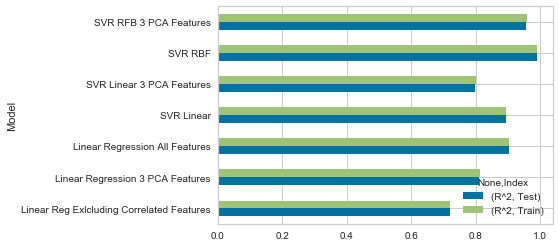

In [66]:
#Reshape Melt or decast Dataframe by using pivot_table               
df_result.pivot_table(
    index=['Model'],
    columns=['Index'],values=['R^2']).plot.barh()

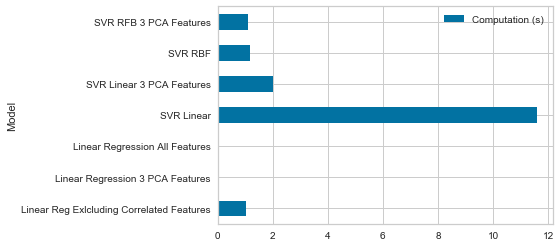

In [67]:
df_result.set_index("Model").drop(
    ["Index","R^2","MAE","MSE","RMSE"],axis=1).drop_duplicates().plot.barh()

In [87]:
print("The SVR rbf model performance SVR rbf is the best among all the models and it about 10 times less expensive than \nSVR Linear Model. After applying PCA and selecting 3 features the SVR linear fuction computation length from 11 seconds is \nreduced to 2 seconds while its accuracy from 89% is reduced to 80%")

The SVR rbf model performance SVR rbf is the best among all the models and it about 10 times less expensive than 
SVR Linear Model. After applying PCA and selecting 3 features the SVR linear fuction computation length from 11 seconds is 
reduced to 2 seconds while its accuracy from 89% is reduced to 80%


In [69]:
print("My name is Farbod Baharkoush")
print("My NetID is: fbahar2")
print("I hereby certify that I have read the University policy on Academic Integrity and that I am not in violation.")

My name is Farbod Baharkoush
My NetID is: fbahar2
I hereby certify that I have read the University policy on Academic Integrity and that I am not in violation.
